In [1]:
import pandas as pd
from scipy.stats import rankdata
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [8]:
signs = pd.read_csv('../datasets/with_text_signs_df.csv')
signs.head()

,borough,house,street_name,block,lot,bin,community_board,sign_illumination,sign_type,sign_height_roof,...,sign_near_park,sign_dist_from_highway,sign_dist_from_park,text_on_sign,sign_near_highway,landmarked,sector,Latitude,Longitude,zone_id
0,MANHATTAN,183,BROADWAY,63,16,1001074,101,NaN,WALL,0,...,N,0,0,ROUND LOGO AND SUNGLASS HUT ...,NaN,NaN,Others,40.710119,-74.009735,261
1,MANHATTAN,85,10TH AVENUE,687,29,1012277,104,Y,WALL,0,...,N,0,0,L'ATELIER DE JOEL ROBUCHON ...,NaN,NaN,"Food, beverages",40.743385,-74.007983,246
2,MANHATTAN,85,10TH AVENUE,687,29,1012277,104,Y,WALL,0,...,N,0,0,L'ATELIER DE JOEL ROBUCHON ...,NaN,NaN,"Food, beverages",40.743385,-74.007983,246
3,MANHATTAN,773,MADISON AVENUE,1381,7502,1076285,108,Y,WALL,0,...,N,0,0,KWIAT ...,NaN,Y,Others,40.768040,-73.967801,237
4,MANHATTAN,485,LEXINGTON AVENUE,1301,23,1036206,106,NaN,WALL,0,...,N,0,0,SOUL CYCLE ...,NaN,NaN,Fitness and wellness,40.754079,-73.973489,162


In [17]:
lob = pd.read_csv('../datasets/legally_operating_businesses_with_coords_and_zones_and_sectors.csv')
lob.head()

C:\Users\Mohammed\AppData\Local\Temp\ipykernel_10696\2580137346.py:1: DtypeWarning: Columns (13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  lob = pd.read_csv('../datasets/legally_operating_businesses_with_coords_and_zones_and_sectors.csv')


,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location,Year,zone_id,Sector
0,2009334-DCA,Business,05/23/2020,Inactive,2014-06-09,Sidewalk Cafe,DCB DELANCEY CORPORATION,SEL ROSE,1,DELANCEY ST,...,1.004240e+09,MN27,18.0,Sidewalk Cafe Type: Regular Unenclosed/Small U...,-73.993820,40.720242,"(40.720241568328824, -73.99382027141543)",2014,148,"Food, beverages"
1,2104048-DCA,Business,06/30/2024,Active,2022-02-22,Electronic & Appliance Service,L & F Group Inc,NaN,87,ELIZABETH ST,...,1.002388e+09,NaN,NaN,NaN,-73.996014,40.718131,"(40.71813094517476, -73.9960137864345)",2022,144,Electronics
2,1191726-DCA,Business,06/30/2009,Inactive,2007-09-26,Home Improvement Contractor,"F. J. SCIAME CONSTRUCTION CO., INC.",NaN,80,SOUTH ST,...,1.000720e+09,MN25,1502.0,NaN,-74.004263,40.705552,"(40.70555169055625, -74.00426318129169)",2007,87,"Do-it-yourself, household, building materials,..."
3,1382144-DCA,Business,08/17/2020,Inactive,2011-02-09,Sidewalk Cafe,IL RIFUGIO INC.,TARALLUCCI E VINO,475,COLUMBUS AVE,...,1.011960e+09,MN12,169.0,"Sidewalk Cafe Type: Unenclosed, Square Feet: 1...",-73.973697,40.784381,"(40.784380716447735, -73.97369731189198)",2011,239,"Food, beverages"
4,2074087-1-DCA,Business,11/30/2023,Active,2018-06-21,Electronic Cigarette Dealer,"JASANI, MUNIRA",NaN,N/W/C,WEST 46 STREET,...,NaN,NaN,NaN,NaN,-73.982255,40.757388,"(40.75738784087671, -73.98225540711462)",2018,230,"General store, department store, mall"


In [21]:
osm_businesses = pd.read_csv('../datasets/osm_manhattan_shops_zones_sectors.csv')
osm_businesses.head()

,lat,lon,name,shop,sector,zone_id
0,40.738716,-73.982473,SVA Campus Store,gift,"Stationery, gifts, books, newspapers",107
1,40.736926,-73.989601,Barnes & Noble,books,"Stationery, gifts, books, newspapers",234
2,40.726611,-73.990173,Random Accessories,gift,"Stationery, gifts, books, newspapers",79
3,40.748699,-73.976186,Dazzle Beauty Salon,hairdresser,Health and beauty,170
4,40.727268,-73.990374,The Hidden Rose,tattoo,Health and beauty,79


In [18]:
# Create the pivot table
signs_count = signs.pivot_table(index='zone_id', columns='sector', aggfunc='size', fill_value=0).reset_index()

# Rename columns for better readability
signs_count.columns.name = None
signs_count.columns = ['zone_id'] + [col for col in signs_count.columns if col != 'zone_id']

signs_count.head()

,zone_id,"Art, music, hobbies","Clothing, shoes, accessories","Do-it-yourself, household, building materials, gardening",Electronics,Financial services,Fitness and wellness,"Food, beverages",Furniture and interior,"General store, department store, mall",Health and beauty,Hospitality,Others,"Outdoors and sport, vehicles",Recreation and parks,"Stationery, gifts, books, newspapers"
0,4,0,0,0,0,0,0,0,0,0,5,0,3,0,0,0
1,13,0,1,0,0,0,0,4,0,9,0,0,23,0,2,0
2,24,0,0,0,1,3,0,2,1,2,3,0,8,0,0,2
3,41,10,24,1,6,19,4,16,6,10,5,0,43,1,1,0
4,42,0,0,0,0,0,0,3,0,3,4,0,14,3,0,0


In [23]:
signs_count.shape

(61, 16)

In [20]:
# Create the pivot table
lob_count = lob.pivot_table(index='zone_id', columns='Sector', aggfunc='size', fill_value=0).reset_index()

# Rename columns for better readability
lob_count.columns.name = None
lob_count.columns = ['zone_id'] + [col for col in lob_count.columns if col != 'zone_id']

lob_count.head()

,zone_id,"Do-it-yourself, household, building materials, gardening",Electronics,Financial services,"Food, beverages","General store, department store, mall",Hospitality,Others,"Outdoors and sport, vehicles",Recreation and parks,"Stationery, gifts, books, newspapers"
0,4,36,15,6,24,164,0,67,4,2,0
1,12,2,0,1,0,1,0,0,1,0,0
2,13,11,2,6,4,33,0,21,55,3,1
3,24,31,34,1,29,91,0,54,9,0,1
4,41,102,155,12,40,310,1,86,59,17,14


In [24]:
lob_count.shape

(65, 11)

In [22]:
# Create the pivot table
osm_count = osm_businesses.pivot_table(index='zone_id', columns='sector', aggfunc='size', fill_value=0).reset_index()

# Rename columns for better readability
osm_count.columns.name = None
osm_count.columns = ['zone_id'] + [col for col in osm_count.columns if col != 'zone_id']

osm_count.head()

,zone_id,"Art, music, hobbies","Clothing, shoes, accessories","Do-it-yourself, household, building materials, gardening",Electronics,Financial services,"Food, beverages",Furniture and interior,"General store, department store, mall",Health and beauty,Others,"Outdoors and sport, vehicles","Stationery, gifts, books, newspapers"
0,4,0,0,1,2,0,12,0,4,4,19,2,1
1,12,0,0,0,0,0,0,0,0,0,1,0,0
2,13,0,0,0,0,0,2,0,5,0,1,0,0
3,24,0,4,2,4,0,11,1,5,19,37,2,1
4,41,2,18,1,7,0,29,4,10,9,22,4,3


In [31]:
# Concatenate the dataframes
merged_df = pd.concat([signs_count, lob_count, osm_count], axis=0, ignore_index=True)

# Fill missing values with zeros
merged_df = merged_df.fillna(0)

# Group by 'zone_id' and sum the counts
merged_df = merged_df.groupby('zone_id').sum().reset_index()

merged_df = merged_df.astype(int)

merged_df.head()

,zone_id,"Art, music, hobbies","Clothing, shoes, accessories","Do-it-yourself, household, building materials, gardening",Electronics,Financial services,Fitness and wellness,"Food, beverages",Furniture and interior,"General store, department store, mall",Health and beauty,Hospitality,Others,"Outdoors and sport, vehicles",Recreation and parks,"Stationery, gifts, books, newspapers"
0,4,0,0,37,17,6,0,36,0,168,9,0,89,6,2,1
1,12,0,0,2,0,1,0,0,0,1,0,0,1,1,0,0
2,13,0,1,11,2,6,0,10,0,47,0,0,45,55,5,1
3,24,0,4,33,39,4,0,42,2,98,22,0,99,11,0,4
4,41,12,42,104,168,31,4,85,10,330,14,1,151,64,18,17


In [28]:
merged_df.shape

(65, 16)

In [32]:
merged_df.columns

Index(['zone_id', 'Art, music, hobbies', 'Clothing, shoes, accessories',
       'Do-it-yourself, household, building materials, gardening',
       'Electronics', 'Financial services', 'Fitness and wellness',
       'Food, beverages', 'Furniture and interior',
       'General store, department store, mall', 'Health and beauty',
       'Hospitality', 'Others', 'Outdoors and sport, vehicles',
       'Recreation and parks', 'Stationery, gifts, books, newspapers'],
      dtype='object')

In [33]:
demo_df = pd.read_csv('../datasets/demographic_scores_and_ranks.csv')

In [38]:
#row for zone id 243
signs_count[signs_count['zone_id'] == 243]

,zone_id,"Art, music, hobbies","Clothing, shoes, accessories","Do-it-yourself, household, building materials, gardening",Electronics,Financial services,Fitness and wellness,"Food, beverages",Furniture and interior,"General store, department store, mall",Health and beauty,Hospitality,Others,"Outdoors and sport, vehicles",Recreation and parks,"Stationery, gifts, books, newspapers"
54,243,2,0,0,7,3,0,5,1,0,5,0,10,1,0,0


In [39]:
osm_count[osm_count['zone_id'] == 243]

,zone_id,"Art, music, hobbies","Clothing, shoes, accessories","Do-it-yourself, household, building materials, gardening",Electronics,Financial services,"Food, beverages",Furniture and interior,"General store, department store, mall",Health and beauty,Others,"Outdoors and sport, vehicles","Stationery, gifts, books, newspapers"
56,243,0,6,0,2,1,13,1,7,6,10,2,1


In [40]:
lob_count[lob_count['zone_id'] == 243]

,zone_id,"Do-it-yourself, household, building materials, gardening",Electronics,Financial services,"Food, beverages","General store, department store, mall",Hospitality,Others,"Outdoors and sport, vehicles",Recreation and parks,"Stationery, gifts, books, newspapers"
58,243,71,294,23,20,478,1,235,91,11,3


In [37]:
#row for zone id 243
merged_df[merged_df['zone_id'] == 243]

,zone_id,"Art, music, hobbies","Clothing, shoes, accessories","Do-it-yourself, household, building materials, gardening",Electronics,Financial services,Fitness and wellness,"Food, beverages",Furniture and interior,"General store, department store, mall",Health and beauty,Hospitality,Others,"Outdoors and sport, vehicles",Recreation and parks,"Stationery, gifts, books, newspapers"
58,243,2,6,71,303,27,0,38,2,485,11,1,255,94,11,4


In [35]:
def plot_business_distribution(data, business_type):

    # Extract data for the specified business type
    zone_ids = data['zone_id']
    counts = data[business_type]

    # Create the bar plot using seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(x=zone_ids, y=counts)
    plt.xlabel('Zone ID')
    plt.ylabel('Count')
    plt.title(f'Distribution of {business_type} Businesses across Zone IDs')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

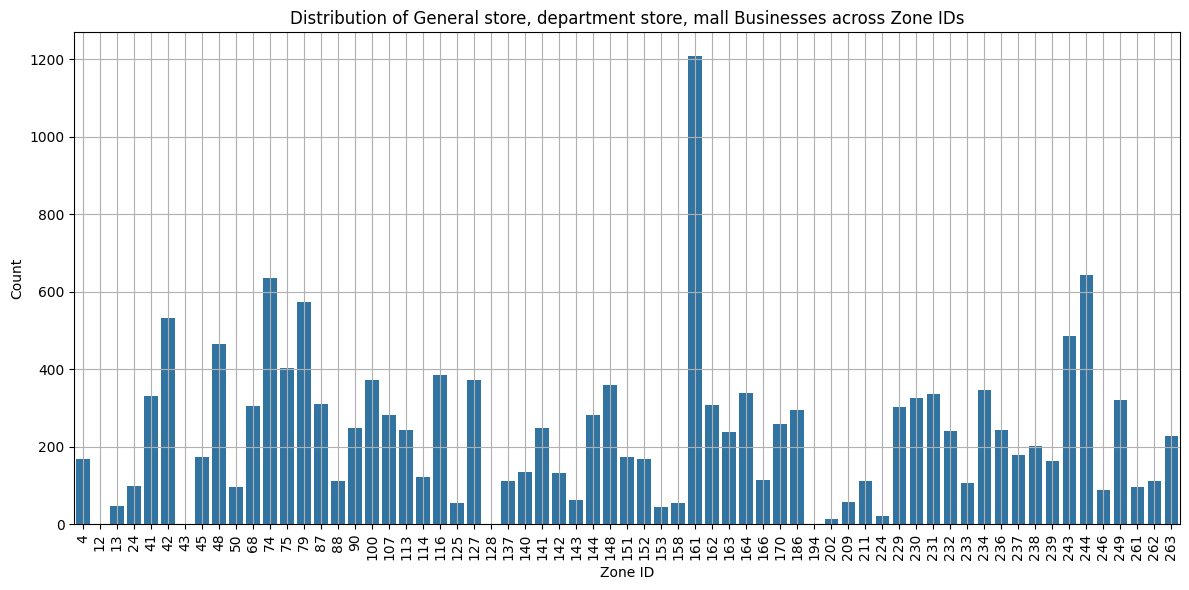

In [60]:
plot_business_distribution(merged_df, 'General store, department store, mall')

In [43]:
def calculate_score(data, business_type):
    #extract data for the specified business type
    counts = data[[business_type]]

    #apply min-max scaling and scale to range 0-100
    scaler = MinMaxScaler(feature_range=(0, 100))
    scaled_counts = scaler.fit_transform(counts)

    #create a DataFrame with the scaled scores
    scores_df = pd.DataFrame(scaled_counts, columns=['score'])
    scores_df['zone_id'] = data['zone_id']

    return scores_df


In [44]:
def calculate_percentile_rank(data, business_type):
    percentile_ranks = data[business_type].rank(pct=True) * 100
    return pd.DataFrame({'zone_id': data['zone_id'], 'rank': percentile_ranks})

In [45]:
e_ranks = calculate_percentile_rank(merged_df, 'Electronics')
e_ranks

,zone_id,rank
0,4,21.538462
1,12,4.615385
2,13,9.230769
3,24,41.538462
4,41,86.153846
...,...,...
60,246,12.307692
61,249,50.000000
62,261,23.076923
63,262,28.461538


In [13]:
e_scores = calculate_score(merged_df, 'Electronics')
e_scores

,score,zone_id
0,4.120879,4
1,0.549451,13
2,12.087912,24
3,59.065934,41
4,22.252747,42
...,...,...
56,1.923077,246
57,17.857143,249
58,4.670330,261
59,6.318681,262


In [46]:
def calc_all_ranks(data):
    results = pd.DataFrame(columns=['zone_id', 'business_type', 'score', 'rank'])

    for business_type in data.columns[1:]:
        scores_df = calculate_score(data, business_type)
        ranks_df = calculate_percentile_rank(data, business_type)

        combined_df = scores_df.merge(ranks_df, on='zone_id')
        combined_df['business_type'] = business_type
        combined_df = combined_df[['zone_id', 'business_type', 'score', 'rank']]
        results = pd.concat([results, combined_df], ignore_index=True)

    return results


In [47]:
business_score_ranks = calc_all_ranks(merged_df)
business_score_ranks

C:\Users\Mohammed\AppData\Local\Temp\ipykernel_10696\1641379420.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, combined_df], ignore_index=True)


,zone_id,business_type,score,rank
0,4,"Art, music, hobbies",0.000000,13.076923
1,12,"Art, music, hobbies",0.000000,13.076923
2,13,"Art, music, hobbies",0.000000,13.076923
3,24,"Art, music, hobbies",0.000000,13.076923
4,41,"Art, music, hobbies",70.588235,95.384615
...,...,...,...,...
970,246,"Stationery, gifts, books, newspapers",5.263158,26.923077
971,249,"Stationery, gifts, books, newspapers",22.807018,60.769231
972,261,"Stationery, gifts, books, newspapers",21.052632,55.384615
973,262,"Stationery, gifts, books, newspapers",7.017544,33.846154


In [48]:
# Function to plot the distribution of score or rank across locations for a given age group
def plot_distribution(data, business_type, metric='score'):
    subset = data[data['business_type'] == business_type]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=subset['zone_id'], y=subset[metric])
    plt.title(f'Distribution of {metric} for {business_type} Across Locations')
    plt.xlabel('zone_id')
    plt.ylabel(metric)
    plt.xticks(rotation=90)
    plt.ylim(0, 100)
    plt.grid(True)
    plt.show()

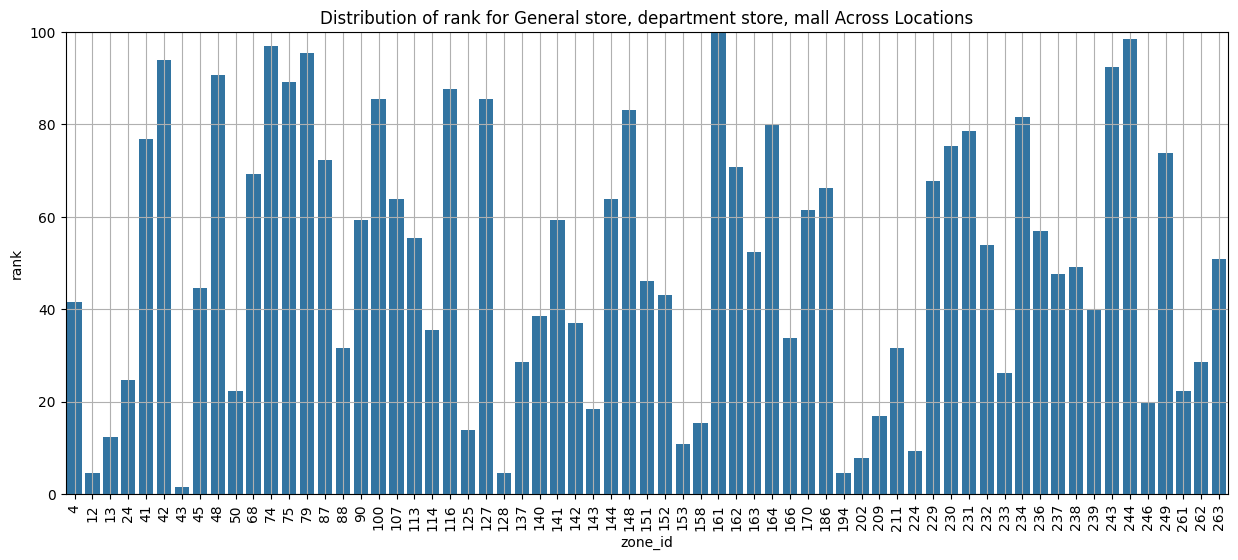

In [62]:
plot_distribution(business_score_ranks, 'General store, department store, mall', 'rank')

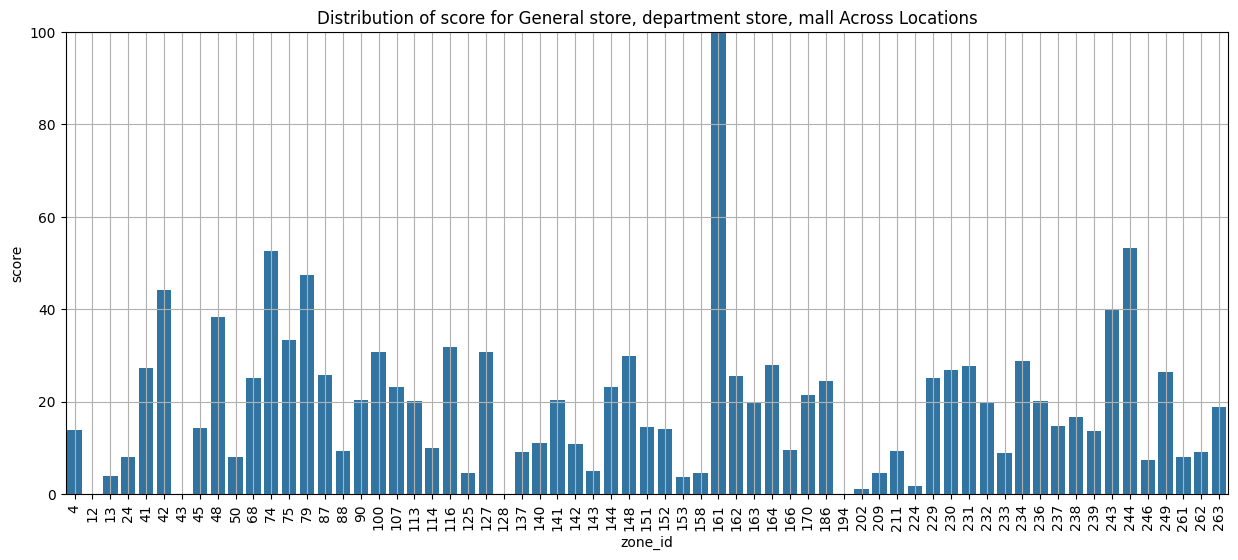

In [63]:
plot_distribution(business_score_ranks, 'General store, department store, mall', 'score')

In [58]:
#export to csv
business_score_ranks.to_csv('../datasets/business_score_ranks.csv', index=False)

In [51]:
demo_df.head()

,gender,age_group,zone_id,score,rank
0,Male,Under 5 years,103,0.046795,5.223881
1,Male,Under 5 years,232,43.191390,82.089552
2,Male,Under 5 years,148,17.594759,48.507463
3,Male,Under 5 years,4,21.759476,61.194030
4,Male,Under 5 years,231,42.863828,80.597015


In [53]:
demo_df

,gender,age_group,zone_id,score,rank
0,Male,Under 5 years,103,0.046795,5.223881
1,Male,Under 5 years,232,43.191390,82.089552
2,Male,Under 5 years,148,17.594759,48.507463
3,Male,Under 5 years,4,21.759476,61.194030
4,Male,Under 5 years,231,42.863828,80.597015
...,...,...,...,...,...
3613,Male and Female,85 years and over,209,14.835729,41.791045
3614,Male and Female,85 years and over,12,0.000000,4.477612
3615,Male and Female,85 years and over,158,7.854209,28.358209
3616,Male and Female,85 years and over,128,0.000000,4.477612


In [54]:
#return rows with zone id 12
demo_df[demo_df['zone_id'] == 12]

,gender,age_group,zone_id,score,rank
63,Male,Under 5 years,12,0.000000,2.238806
130,Male,5 to 9 years,12,0.041999,8.208955
197,Male,10 to 14 years,12,0.000000,3.731343
264,Male,15 to 19 years,12,0.000000,2.238806
331,Male,20 to 24 years,12,0.000000,3.731343
398,Male,25 to 29 years,12,0.000000,3.731343
465,Male,30 to 34 years,12,0.000000,3.731343
532,Male,35 to 39 years,12,0.000000,2.985075
599,Male,40 to 44 years,12,0.000000,3.731343
666,Male,45 to 49 years,12,0.000000,3.731343


In [55]:
demo_df.dtypes

gender        object
age_group     object
zone_id        int64
score        float64
rank         float64
dtype: object

In [56]:
business_score_ranks.dtypes

zone_id           object
business_type     object
score            float64
rank             float64
dtype: object

In [57]:
#change zone id to int
business_score_ranks['zone_id'] = business_score_ranks['zone_id'].astype(int)
demo_df['zone_id'] = demo_df['zone_id'].astype(int)

In [62]:
def validate_selection(selection, valid_values, selection_name):
    # Special case for gender selection
    if selection_name == 'genders' and set(selection) == {'Male', 'Female', 'Male and Female'}:
        selection = ['Male and Female']

    invalid_values = [item for item in selection if item not in valid_values]
    if invalid_values:
        raise ValueError(f"Invalid {selection_name} values: {invalid_values}")

    return selection


# Function to calculate combined scores and ranks
def calculate_combined_scores_and_ranks(demographics_data, business_data, selected_genders, selected_age_groups, selected_businesses, demographic_weight=0.5, business_weight=0.5):
    """
    Calculate combined average scores and ranks for zones based on selected demographics and business types.

    Parameters:
    - demographics_data (pd.DataFrame): DataFrame containing demographic data with columns ['gender', 'age_group', 'zone_id', 'score', 'rank'].
    - business_data (pd.DataFrame): DataFrame containing business data with columns ['zone_id', 'business_type', 'score', 'rank'].
    - selected_genders (list of str): List of selected genders to filter the demographic data.
    - selected_age_groups (list of str): List of selected age groups to filter the demographic data.
    - selected_businesses (list of str): List of selected business types to filter the business data.
    - demographic_weight (float): Weight for the demographic score and rank in the final calculation. Must sum to 1 with business_weight.
    - business_weight (float): Weight for the business score and rank in the final calculation. Must sum to 1 with demographic_weight.

    Returns:
    - pd.DataFrame: DataFrame with combined average scores and ranks for each zone, with columns ['zone_id', 'average_score', 'average_rank'].

    Raises:
    - ValueError: If any of the selected genders, age groups, or business types are invalid or if the weights do not sum to 1.
    """

    if demographic_weight + business_weight != 1:
        raise ValueError("The sum of demographic_weight and business_weight must be 1.")

    # Validate user input.
    valid_genders = demographics_data['gender'].unique()
    selected_genders = validate_selection(selected_genders, valid_genders, 'genders')

    valid_age_groups = demographics_data['age_group'].unique()
    selected_age_groups = validate_selection(selected_age_groups, valid_age_groups, 'age groups')

    valid_business_types = business_data['business_type'].unique()
    selected_businesses = validate_selection(selected_businesses, valid_business_types, 'business types')

    # Filter demographics data
    filtered_demographics = demographics_data[(demographics_data['gender'].isin(selected_genders)) &
                                              (demographics_data['age_group'].isin(selected_age_groups))]

    # Calculate average demographic score and rank for each zone
    avg_demographic_scores = filtered_demographics.groupby('zone_id')['score'].mean().reset_index()
    avg_demographic_ranks = filtered_demographics.groupby('zone_id')['rank'].mean().reset_index()

    # Merge demographic scores and ranks
    combined_demographic_data = avg_demographic_scores.merge(avg_demographic_ranks, on='zone_id', suffixes=('_score', '_rank'))

    # Filter business data based on selected business types
    filtered_business_data = business_data[business_data['business_type'].isin(selected_businesses)]

    # Calculate average business score and rank for each zone
    avg_business_scores = filtered_business_data.groupby('zone_id')['score'].mean().reset_index()
    avg_business_ranks = filtered_business_data.groupby('zone_id')['rank'].mean().reset_index()

    # Merge business scores and ranks
    combined_business_data = avg_business_scores.merge(avg_business_ranks, on='zone_id', suffixes=('_score', '_rank'))

    # Merge demographic and business data
    combined_data = combined_demographic_data.merge(combined_business_data, on='zone_id', how='outer', suffixes=('_demographic', '_business'))

    # Fill NaN values with 0
    combined_data = combined_data.fillna(0)

    # Calculate final combined average score and rank for each zone with weights
    combined_data['final_avg_score'] = (combined_data['score_demographic'] * demographic_weight + combined_data['score_business'] * business_weight)
    combined_data['final_avg_rank'] = (combined_data['rank_demographic'] * demographic_weight + combined_data['rank_business'] * business_weight)

    # Select and rename columns
    result = combined_data[['zone_id', 'final_avg_score', 'final_avg_rank']]
    result = result.rename(columns={'final_avg_score': 'average_score', 'final_avg_rank': 'average_rank'})

    return result

In [64]:


# selected_genders = ['Female', 'Male']
# selected_age_groups = ['15 to 19 years', '20 to 24 years', '25 to 29 years']
# selected_businesses = ['Food, beverages', 'Electronics', 'Others']

# selected_genders = ['Female', 'Male']
# selected_age_groups = ['15 to 19 years']
# selected_businesses = ['Food, beverages']

final_results = calculate_combined_scores_and_ranks(demo_df, business_score_ranks, selected_genders, selected_age_groups, selected_businesses, demographic_weight=0.7, business_weight=0.3)

final_results

,zone_id,average_score,average_rank
0,4,18.360400,51.041106
1,12,0.000000,2.089552
2,13,8.726979,31.037436
3,24,11.763790,38.550893
4,41,43.061883,80.330316
...,...,...,...
62,246,9.779761,29.042085
63,249,29.454899,50.003670
64,261,2.787142,15.549303
65,262,18.043371,49.535111


In [65]:
final_results = calculate_combined_scores_and_ranks(demo_df, business_score_ranks, selected_genders, selected_age_groups, selected_businesses, demographic_weight=0.3, business_weight=0.7)

final_results

,zone_id,average_score,average_rank
0,4,10.344246,26.558600
1,12,0.000000,0.895522
2,13,8.278556,22.669440
3,24,10.095776,27.763029
4,41,39.084283,70.024468
...,...,...,...
62,246,15.434235,34.929043
63,249,58.317185,73.889161
64,261,3.051116,10.411059
65,262,9.073771,24.039638


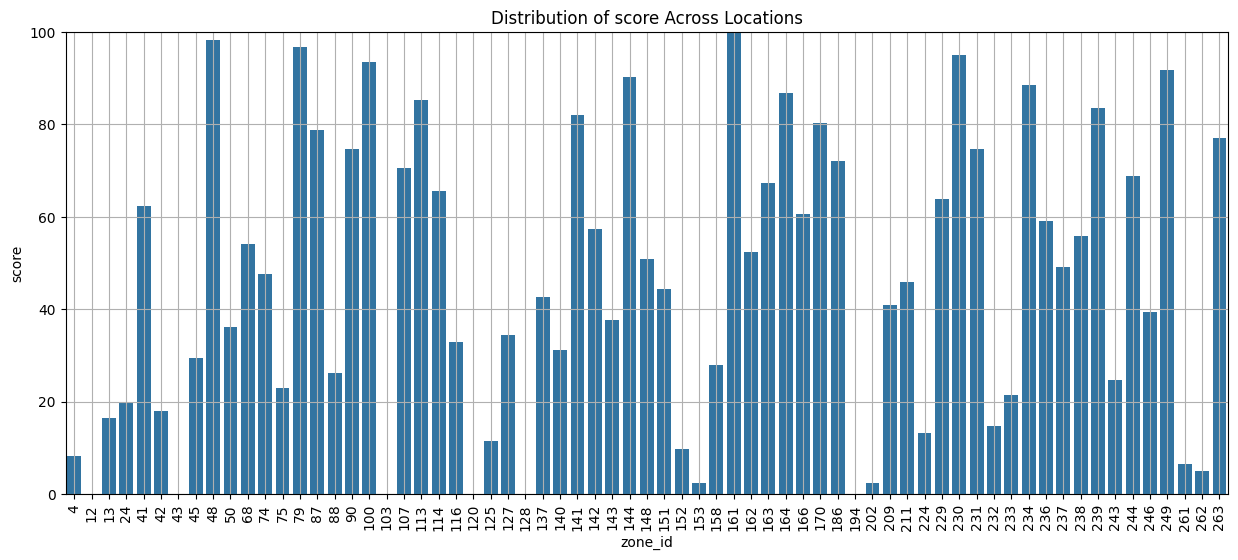

In [61]:
subset = final_results

plt.figure(figsize=(15, 6))
sns.barplot(x=subset['zone_id'], y=subset['average_rank'])
plt.title(f'Distribution of score Across Locations')
plt.xlabel('zone_id')
plt.ylabel('score')
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.grid(True)
plt.show()